# Install the requirements

In [ ]:
!pip install huggingface-hub

In [6]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 121.4 MB/s eta 0:00:00


In [2]:
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.1 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 92.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 170.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.9/407.9 kB 132.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8

In [13]:
!pip install SentencePiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.5 MB/s eta 0:00:00a 0:00:01


# Login to huggingface

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

In [25]:
from transformers import TextIteratorStreamer
import gradio as gr
from threading import Thread

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]
DESCRIPTION = '''
<div>
<h1 style="text-align: center;">Meta Llama3 8B</h1>
'''

LICENSE = """
<p/>
---
Built with Meta Llama 3
"""


css = """
h1 {
  text-align: center;
  display: block;
}
#duplicate-button {
  margin: auto;
  color: white;
  background: #1565c0;
  border-radius: 100vh;
}
"""

def chat_llama3_8b(message: str, 
              history: list, 
              temperature: float, 
              max_new_tokens: int
             ) -> str:
    """
    Generate a streaming response using the llama3-8b model.
    Args:
        message (str): The input message.
        history (list): The conversation history used by ChatInterface.
        temperature (float): The temperature for generating the response.
        max_new_tokens (int): The maximum number of new tokens to generate.
    Returns:
        str: The generated response.
    """
    conversation = []
    for user, assistant in history:
        conversation.extend([{"role": "user", "content": user}, {"role": "assistant", "content": assistant}])
    conversation.append({"role": "user", "content": message})

    input_ids = tokenizer.apply_chat_template(conversation, return_tensors="pt").to(model.device)
    
    streamer = TextIteratorStreamer(tokenizer, timeout=10.0, skip_prompt=True, skip_special_tokens=True)

    generate_kwargs = dict(
        input_ids= input_ids,
        streamer=streamer,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=temperature,
        eos_token_id=terminators,
    )
    # This will enforce greedy generation (do_sample=False) when the temperature is passed 0, avoiding the crash.             
    if temperature == 0:
        generate_kwargs['do_sample'] = False
        
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    outputs = []
    for text in streamer:
        outputs.append(text)
        print(outputs)
        yield "".join(outputs)
        

# Gradio block
chatbot=gr.Chatbot(height=450, label='Gradio ChatInterface')

with gr.Blocks(fill_height=True, css=css) as demo:
    
    gr.Markdown(DESCRIPTION)
    gr.ChatInterface(
        fn=chat_llama3_8b,
        chatbot=chatbot,
        fill_height=True,
        additional_inputs_accordion=gr.Accordion(label="⚙️ Parameters", open=False, render=False),
        additional_inputs=[
            gr.Slider(minimum=0,
                      maximum=1, 
                      step=0.1,
                      value=0.95, 
                      label="Temperature", 
                      render=False),
            gr.Slider(minimum=128, 
                      maximum=4096,
                      step=1,
                      value=512, 
                      label="Max new tokens", 
                      render=False ),
            ],
        examples=[
            ['How to create dataframe in python?'],
            ['Explain theory of Convolutional Neural Networks to me like I’m 8 years old.'],
            ['What is the difference between instruct and base model in llms'],
            ['Who is curren president of the united states?']
            ],
        cache_examples=False,
                     )
    
    gr.Markdown(LICENSE)
    demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7871
Running on public URL: https://f3982eed93467ec161.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Hardware Info

In [20]:
!nvidia-smi

Sun Apr 21 05:16:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX 4000 Ada Gene...    On  | 00000000:C1:00.0 Off |                  Off |
| 30%   37C    P8              12W / 130W |  16897MiB / 20475MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


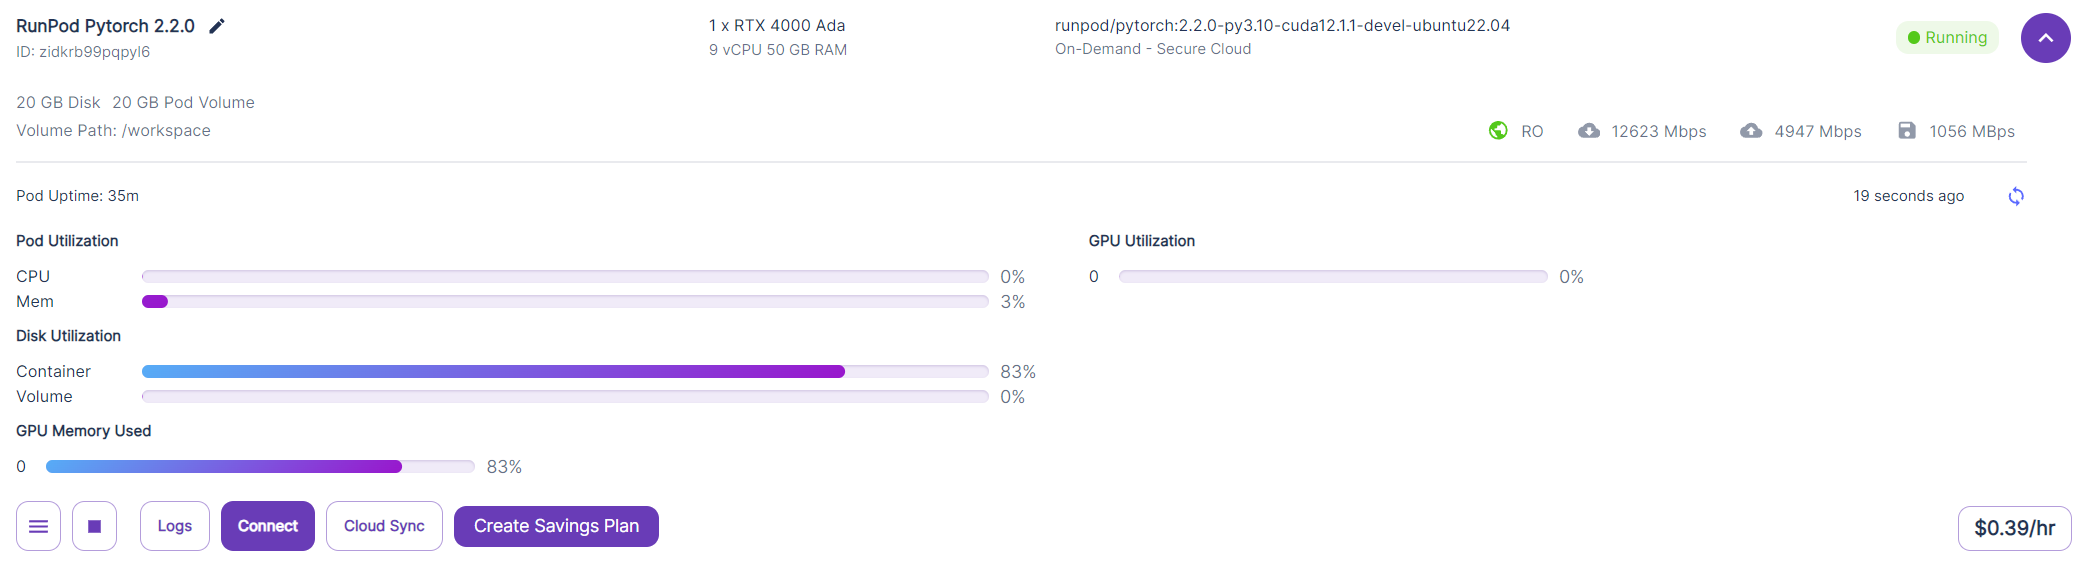